In [1]:
# E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

# Downloads names.txt from Andres github

In [2]:
!wget -nc https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

File ‘names.txt’ already there; not retrieving.



In [3]:
words = open('names.txt', 'r').read().lower().strip().splitlines()

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
import torch

# Counting Trigrams in a python dictionary

In [8]:
trigram_counts = {}
for w in words:
    chs = f".{w}."
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        trigram_counts[trigram] = trigram_counts.get(trigram, 0) + 1


sort = sorted(trigram_counts.items(), key = lambda item: -item[1])

In [9]:
chars = sorted(set(''.join(words)))

itoc = {i+1:char for i, char in enumerate(chars)}
itoc[0] = '.'

ctoi = {char:i for i, char in itoc.items()}

In [10]:
ctoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

# Counting Trigrams in pytorch tensor

In [11]:
import torch

In [12]:
a = torch.zeros((28,28,28))

In [13]:
a.dtype

torch.float32

In [14]:
N = torch.zeros((27,27,27), dtype=torch.int32)

In [15]:
trigram_counts = {}
for w in words:
    chs = f".{w}."
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        # map char1, char2, and char3 to thier integers
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        ix3 = ctoi[ch3]
        N[ix1, ix2, ix3] += 1
        


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import string
import random

/tmp/ipykernel_2274325/1840378011.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  heatmap_data[row_index, :] = N[i, j, :]


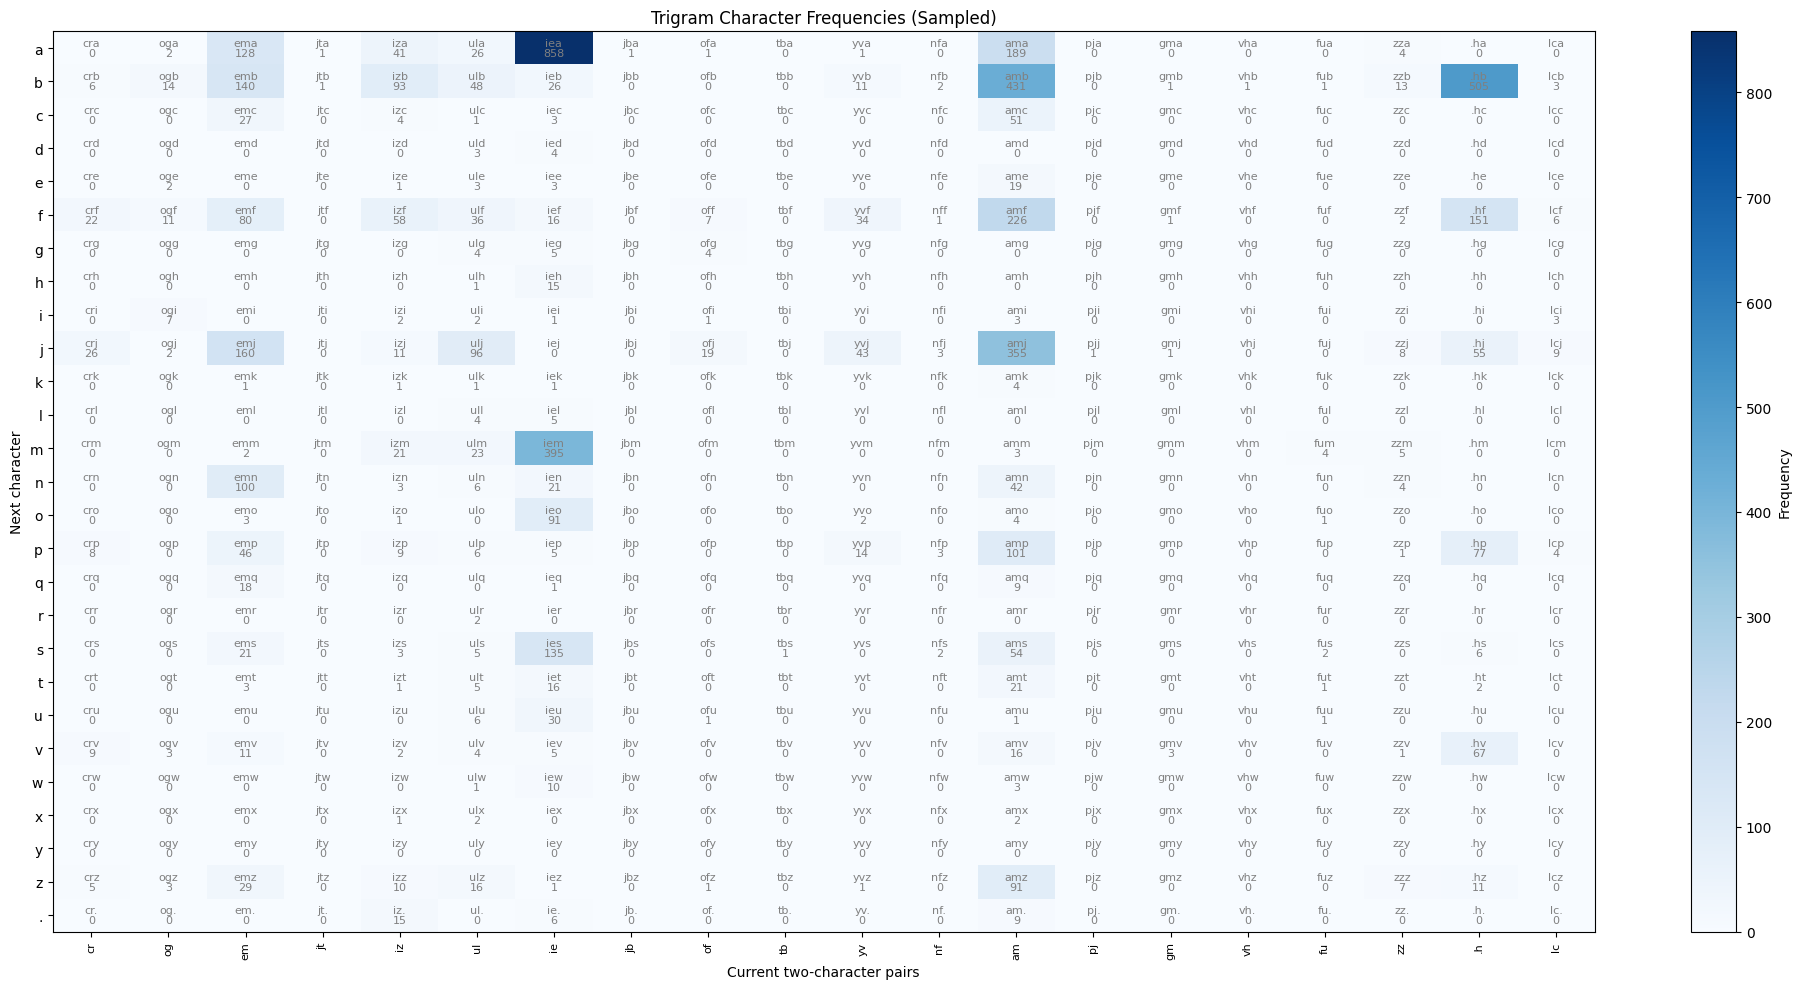

In [17]:
# Aggregate the data into a 2D matrix
num_chars = len(ctoi)
heatmap_data = np.zeros((num_chars * num_chars, num_chars))

for i in range(num_chars):
    for j in range(num_chars):
        row_index = i * num_chars + j
        heatmap_data[row_index, :] = N[i, j, :]

# Create labels for the x-axis (current two-character pairs)
x_labels = [itoc[i] + itoc[j] for i in range(num_chars) for j in range(num_chars)]

# Filter out pairs with all zero counts
non_zero_indices = [i for i in range(num_chars * num_chars) if np.sum(heatmap_data[i, :]) > 0]

# Sample a subset of non-zero x_labels and corresponding heatmap data
num_samples = 20  # Adjust this number for more or fewer labels
sampled_indices = random.sample(non_zero_indices, num_samples)
heatmap_sampled = heatmap_data[sampled_indices, :]
x_labels_sampled = [x_labels[i] for i in sampled_indices]

# Create labels for the y-axis (next character)
y_labels = list(itoc.values())

# Find the maximum count for setting color scale
max_count = heatmap_sampled.max()

# Plot the heatmap
plt.figure(figsize=(20, 10))
plt.imshow(heatmap_sampled.T, cmap='Blues', aspect='auto', vmin=0, vmax=max_count)
plt.colorbar(label='Frequency')

# Set axis labels
plt.xticks(np.arange(len(x_labels_sampled)), x_labels_sampled, rotation=90, fontsize=8)
plt.yticks(np.arange(len(y_labels)), y_labels, fontsize=10)

# Add text labels inside each box
for i in range(heatmap_sampled.shape[1]):
    for j in range(heatmap_sampled.shape[0]):
        pair_index = sampled_indices[j]
        ch1 = itoc[pair_index // num_chars]
        ch2 = itoc[pair_index % num_chars]
        ch3 = y_labels[i]
        trio_str = ch1 + ch2 + ch3
        count = int(heatmap_sampled[j, i])
        plt.text(j, i, trio_str, ha="center", va="bottom", color='gray', fontsize=8)
        plt.text(j, i, count, ha="center", va="top", color='gray', fontsize=8)

plt.xlabel('Current two-character pairs')
plt.ylabel('Next character')
plt.title('Trigram Character Frequencies (Sampled)')

plt.tight_layout()
plt.show()